In [3]:
import torch
from torch import nn
import matplotlib.pyplot as plt

In [4]:
#Device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

In [5]:
#Exercise 1 

#Data

#y = mx + b

w = 0.3
b = 0.9

start = 0
end = 1
step = 0.02

x = torch.arange(start,end, step).unsqueeze(1)
y = w*x + b
x[:10], y[:10]

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800]]),
 tensor([[0.9000],
         [0.9060],
         [0.9120],
         [0.9180],
         [0.9240],
         [0.9300],
         [0.9360],
         [0.9420],
         [0.9480],
         [0.9540]]))

In [6]:
#Split data into training and testing sets
tSplit = int(0.8 *len(x))
x_train, y_train = x[:tSplit], y[:tSplit]
x_test, y_test = x[tSplit:], y[tSplit:]
len(x_train), len(x_test), len(y_train), len(y_test)

(40, 10, 40, 10)

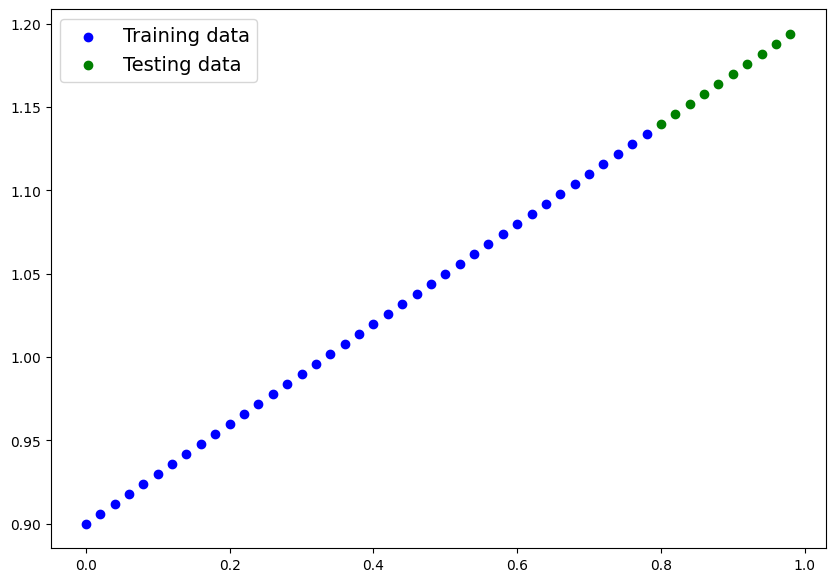

In [8]:
def plot_predict(train_data=x_train,
                train_labels=y_train,
                test_data=x_test,
                test_labels=y_test,
                predictions=None):
    plt.figure(figsize=(10, 7))

    plt.scatter(train_data, train_labels, c='b', label='Training data') #train in blue

    plt.scatter(test_data, test_labels, c='g', label='Testing data') #test in green

    if predictions is not None:
        plt.scatter(test_data, predictions, c='r', label='Predictions') #predictions in red

    plt.legend(prop={"size": 14})

plot_predict()

In [9]:
class LinearRegressionModelV2(nn.Module):
    def __init__(self):
        super().__init__()
        #Use nn.Linear to create a linear transformation of the form y = wx + b

        self.linear_layer = nn.Linear(in_features=1, out_features=1)

    def forward(self, x: torch.Tensor) -> torch.Tensor:
        return self.linear_layer(x)
    

#Set random seed
torch.manual_seed(42)

model_1 = LinearRegressionModelV2()
model_1, model_1.state_dict()

(LinearRegressionModelV2(
   (linear_layer): Linear(in_features=1, out_features=1, bias=True)
 ),
 OrderedDict([('linear_layer.weight', tensor([[0.7645]])),
              ('linear_layer.bias', tensor([0.8300]))]))

In [10]:
model_1.to(device)
next(model_1.parameters()).device

device(type='cuda', index=0)

In [11]:
#Set up loss function

loss_fn = nn.L1Loss()

#Set up optimizer

optimizer = torch.optim.SGD(model_1.parameters(), lr=0.01)

In [17]:
torch.manual_seed(42)


epochs = 200

#Put data on device

x_train, y_train = x_train.to(device), y_train.to(device)
x_test, y_test = x_test.to(device), y_test.to(device)

for epoch in range(epochs):
    model_1.train()

    #1. Forward pass
    y_pred = model_1(x_train)

    #2. Calculate loss
    loss = loss_fn(y_pred, y_train)

    #3. Zero gradients
    optimizer.zero_grad()

    #4. Backward pass
    loss.backward()

    #5. Step with optimizer
    optimizer.step()

    #Testing
    model_1.eval()

    with torch.inference_mode():
        test_pred = model_1(x_test)
        test_loss = loss_fn(test_pred, y_test)

        if epoch % 10 == 0:
            print(f"Epoch: {epoch} | MAE Train Loss: {loss} | MAE Test Loss: {test_loss} ")
            

Epoch: 0 | MAE Train Loss: 0.01710296794772148 | MAE Test Loss: 0.039198245853185654 
Epoch: 10 | MAE Train Loss: 0.013664156198501587 | MAE Test Loss: 0.03092588298022747 
Epoch: 20 | MAE Train Loss: 0.010232262313365936 | MAE Test Loss: 0.023340368643403053 
Epoch: 30 | MAE Train Loss: 0.0067993286065757275 | MAE Test Loss: 0.015068006701767445 
Epoch: 40 | MAE Train Loss: 0.003360512899234891 | MAE Test Loss: 0.006795644760131836 
Epoch: 50 | MAE Train Loss: 0.007012799382209778 | MAE Test Loss: 0.003249275730922818 
Epoch: 60 | MAE Train Loss: 0.007012799382209778 | MAE Test Loss: 0.003249275730922818 
Epoch: 70 | MAE Train Loss: 0.007012799382209778 | MAE Test Loss: 0.003249275730922818 
Epoch: 80 | MAE Train Loss: 0.007012799382209778 | MAE Test Loss: 0.003249275730922818 
Epoch: 90 | MAE Train Loss: 0.007012799382209778 | MAE Test Loss: 0.003249275730922818 
Epoch: 100 | MAE Train Loss: 0.007012799382209778 | MAE Test Loss: 0.003249275730922818 
Epoch: 110 | MAE Train Loss: 0.00

In [18]:
model_1.state_dict(), w, b

(OrderedDict([('linear_layer.weight', tensor([[0.3064]], device='cuda:0')),
              ('linear_layer.bias', tensor([0.9045], device='cuda:0'))]),
 0.3,
 0.9)

In [19]:
# Turn model into evaluation mode
model_1.eval()

# Make predictions on the test data
with torch.inference_mode():
    y_preds = model_1(x_test)
y_preds

tensor([[1.1496],
        [1.1558],
        [1.1619],
        [1.1680],
        [1.1742],
        [1.1803],
        [1.1864],
        [1.1925],
        [1.1987],
        [1.2048]], device='cuda:0')

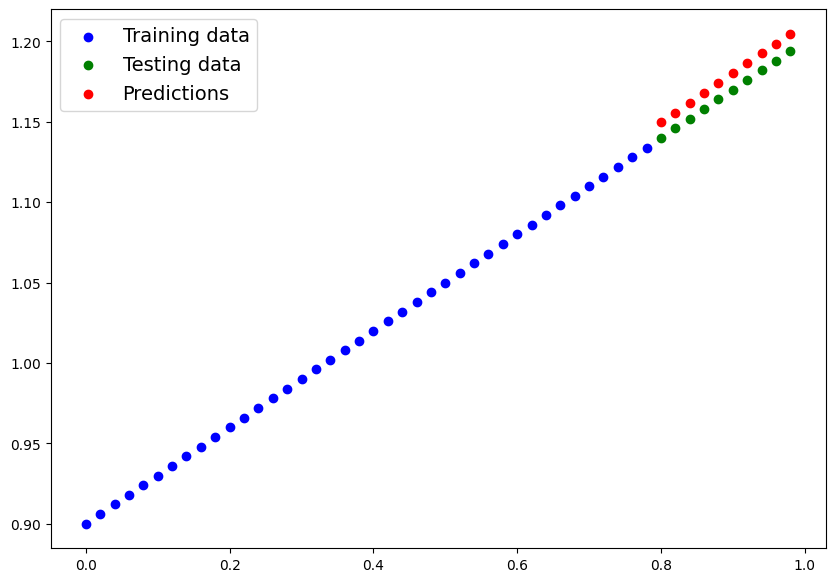

In [20]:
plot_predict(predictions=y_preds.cpu())